In [1]:
%matplotlib inline
import numpy as np
from time import time
from Settings import *
from Agent import *
from Obstacles import *
from Foods import *
from World import *  
np.set_printoptions(linewidth=150,precision=0)
print 'OpenCV:{},Numpy:{} '.format(cv2.__version__ ,np.version.full_version)
np.random.seed(10)

OpenCV:3.1.0,Numpy:1.11.2 


### Example of Using the Classes

In [2]:
start = time()
Settings.WorldSize=(11,11)
#Settings.WorldSize=  (9,9)
# Define Distribution (Some Poplular Distributions) (Same probability for all active Blocks)
CP = Settings.WorldSize[0]/2
# Upper left
UL = np.zeros(Settings.WorldSize)
UL[0:CP,0:CP]=1
#Upper right 
UR = np.zeros(Settings.WorldSize)
UR[0:CP,CP:]=1

#Bottom Left
BL = np.zeros(Settings.WorldSize)
BL[CP:,0:CP]=1

#Bottom Right
BR= np.zeros(Settings.WorldSize)
BR[CP:,CP:]=1

#Center
C  = np.zeros(Settings.WorldSize)
number = CP/2
C[CP-number:CP+number,CP-number:CP+number]=1

Settings.AddProbabilityDistribution(Name='UL',IntProbabilityDst=UL)
Settings.AddProbabilityDistribution(Name='UR',IntProbabilityDst=UR)
Settings.AddProbabilityDistribution(Name='BL',IntProbabilityDst=BL)
Settings.AddProbabilityDistribution(Name='BR',IntProbabilityDst=BR)
Settings.AddProbabilityDistribution(Name='C',IntProbabilityDst=C)

#Add Images
Settings.AddImage('Wall','Pics/wall.jpg')
Settings.AddImage('Water','Pics/water.jpg')
Settings.AddImage('Food','Pics/food.jpg')
Settings.Images[0]=np.tile(1,(Settings.BlockSize[0],Settings.BlockSize[1],3)) #Empty
Settings.Images[-1] =np.tile(0,(Settings.BlockSize[0],Settings.BlockSize[1],3)) # black or unobservable

#Define Agents 
#gAgent = Agent(Fname='Pics/gagent.jpg',PdstName='UL',VisionAngle=90,Range=-1,Power=2,EgoCentric=True)
#rAgent = Agent(Fname='Pics/ragent.jpg',PdstName='UR',VisionAngle=90,Range=3,Power=3)
rAgent = Agent(Fname='Pics/ragent.jpg',Power=3,VisionAngle=90,Range=3)
gAgent = Agent(Fname='Pics/gagent.jpg',VisionAngle=180,Range=1,ControlRange=0)

#Create Obstacles
Plusobs = Obstacles('Water',Shape=np.array([[0,1,0],[1,1,1],[0,1,0]]),See=True,PdstName='C')
Tobs = Obstacles('Wall',Shape=np.array([[1,1,1],[0,1,0],[0,1,0]]),PdstName='C')
Robs = Obstacles('Wall',Shape=np.array([1,1,1]),PdstName='C')
Cobs = Obstacles('Wall',Shape=np.array([[1],[1],[1]]),PdstName='C')
BLOCK = Obstacles('Wall',Shape=np.array([[1,1],[1,1]]),PdstName='C')
Unite = Obstacles('Wall',Shape=np.array([1]),PdstName='C')

#Create Food
hamburger = Foods(ImageKey='Food',See=False,PdstName='BR')
hamburger2 = Foods(ImageKey='Food',See=False,PdstName='BR')

ElementsInitTime = time()-start
print 'Initialization cost:',ElementsInitTime
def tt(agents,foods,rwrdschemss,world):
    rwrdschemss[0]=100
wt = time()
t = World()#RewardFunction=tt)
t.AddAgents([rAgent,gAgent])
t.AddFoods([hamburger,hamburger2])
t.AddObstacles([Plusobs,Tobs,Robs,Cobs,BLOCK,Unite])
t.GenerateWorld()
wt = time()-wt

Initialization cost: 0.175195932388


Building image took: 0.0385251045227
[[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False  True False False False False]
 [False False False False False False  True False False False False]
 [False False False False False  True  True  True False False False]
 [False False False  True False  True  True False False False False]
 [False False  True  True  True  True  True False False False False]
 [False False False False False False False False  True False False]
 [False False False False False False False False  True False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]]


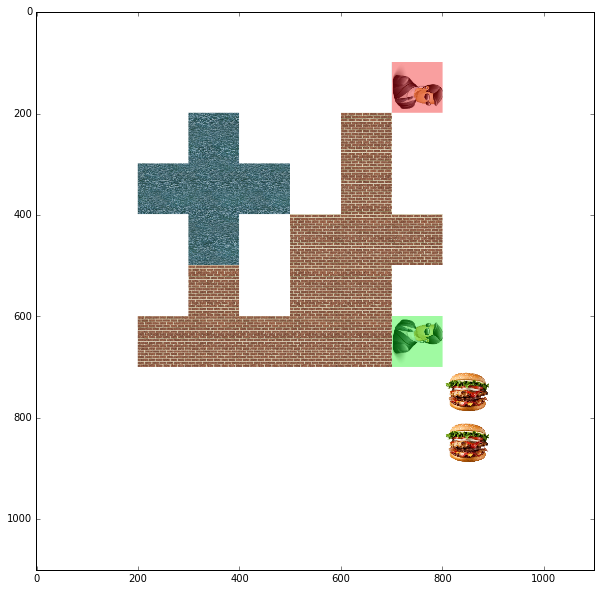

In [3]:
plt.figure(figsize=Settings.FigureSize)
img = time()
xx = t.BuildImage()
print 'Building image took:',time()-img
print t.VBM
plt.imshow(xx)

# Field of Vision Testing

In [4]:
def ElementsGeneratingTesting():
    #Draw Agents in Different Directions
    plt.figure()
    gAgent.DrawDirectionImage()
    rAgent.DrawDirectionImage()

    #Draw The obstacles
    plt.figure(figsize=Settings.FigureSize)
    plt.subplot(2,4,1)
    plt.imshow(Plusobs.GetImage())
    plt.title('Plus Sign obstacle,ID:{}'.format(Plusobs.ID))
    plt.subplot(2,4,2)
    plt.imshow(Tobs.GetImage())
    plt.title('T Sign obstacle,ID:{}'.format(Tobs.ID))
    plt.subplot(2,4,3)
    plt.imshow(Robs.GetImage())
    plt.title('Row  obstacle,ID:{}'.format(Robs.ID))
    plt.subplot(2,4,4)
    plt.imshow(Cobs.GetImage())
    plt.title('Column  obstacle,ID:{}'.format(Cobs.ID))
    plt.subplot(2,4,5)
    plt.imshow(BLOCK.GetImage())
    plt.title('BLOCK  obstacle,ID:{}'.format(BLOCK.ID))
    plt.subplot(2,4,6)
    plt.imshow(Unite.GetImage())
    plt.title('Unite  obstacle,ID:{}'.format(Unite.ID))

    #Draw Food
    plt.subplot(2,4,6)
    plt.imshow(hamburger.GetImage())
    plt.title('Hamburger,ID:{}'.format(hamburger.ID))

    print 'Generating World Cost:{}s , Creating Elements Cost:{}s'.format(wt,ElementsInitTime)
    print t.world
    print '\n Vision Blockers Map\n'
    print t.VBM
    plt.figure(figsize=Settings.FigureSize)
    img = time()
    xx = t.BuildImage()
    print 'Building image took:',time()-img
    plt.imshow(xx)

def VisionFieldTest():
    print 'North'
    print np.array(rAgent.VisionFields['N'],dtype=np.int)
    print 'West'
    print np.array(rAgent.VisionFields['W'],dtype=np.int)
    print 'South'
    print np.array(rAgent.VisionFields['S'],dtype=np.int)
    print 'East'
    print np.array(rAgent.VisionFields['E'],dtype=np.int)
    print 'Cost'
    print rAgent.VisionFields['Time']

def VisualizationTest():
    '''
    Start = time()
    t._GetTotalVision(gAgent.ID)
    t._GetTotalVision(rAgent.ID)
    ElementsInitTime = time()-Start
    print 'Full Total Vision for Two agents cost:',ElementsInitTime
'''
    plt.figure(figsize=(40,40))
    plt.subplot(3,2,1)
    plt.title(t.agents[1002].Direction)
    plt.imshow(t.AgentViewPoint(1002))
    plt.subplot(3,2,2)
    plt.title(t.agents[1002].Direction)
    plt.imshow(t.AgentViewPoint(1002))
    plt.subplot(3,2,3)
    plt.title(t.agents[1001].Direction)
    plt.imshow(t.AgentViewPoint(1001))
    plt.subplot(3,2,4)
    plt.title(t.agents[1001].Direction)
    plt.imshow(t.AgentViewPoint(1001))
    plt.subplot(3,2,5)
    plt.title('Full')
    plt.imshow(t.BuildImage())

In [5]:

Start = time()
t.Step()
rAgent.DetectAndAstar()
gAgent.DetectAndAstar()
print 'Step took :',time()-Start

Step took : 0.00440406799316


In [6]:
print t.agents[1001].CurrentReward
print t.agents[1002].CurrentReward

-1
-1


Generating World Cost:0.0220320224762s , Creating Elements Cost:0.195914983749s
[[   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 1001    0    0    0]
 [   0    0    0 3001    0    0 3004    0    0    0    0]
 [   0    0 3001 3001 3001    0 3004    0    0    0    0]
 [   0    0    0 3001    0 3002 3002 3002    0    0    0]
 [   0    0    0 3006    0 3005 3002    0    0    0    0]
 [   0    0 3003 3003 3003 3005 3002 1002    0    0    0]
 [   0    0    0    0    0    0    0    0 2002    0    0]
 [   0    0    0    0    0    0    0    0 2001    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0]]

 Vision Blockers Map

[[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False  True False False False False]
 [False False False False False False  True False F

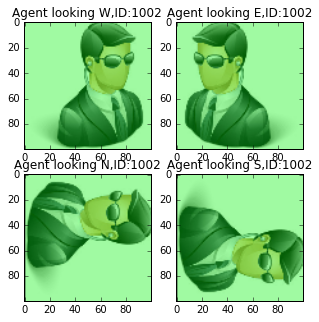

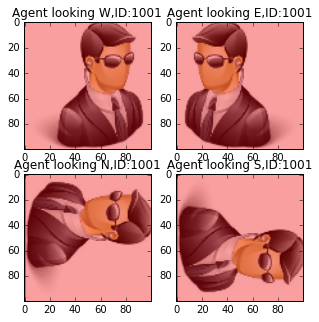

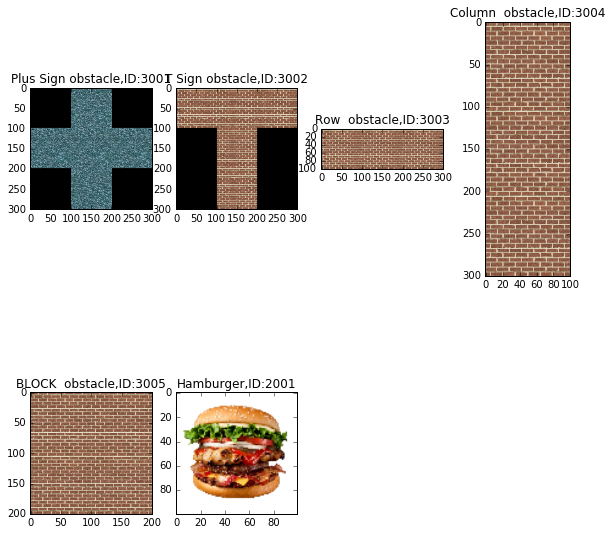

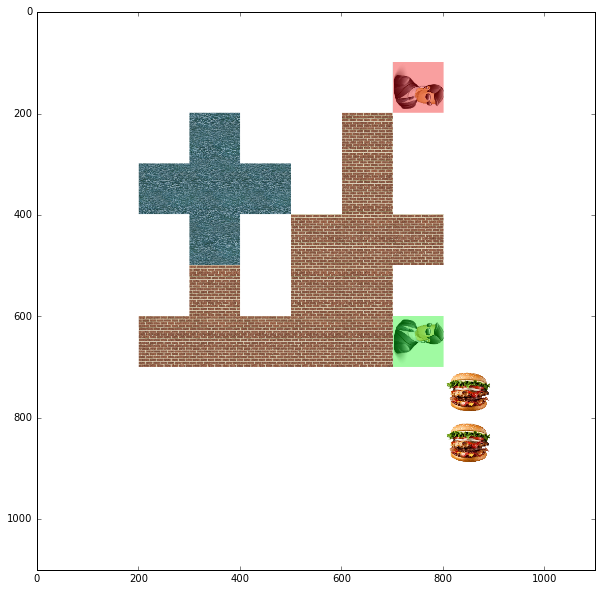

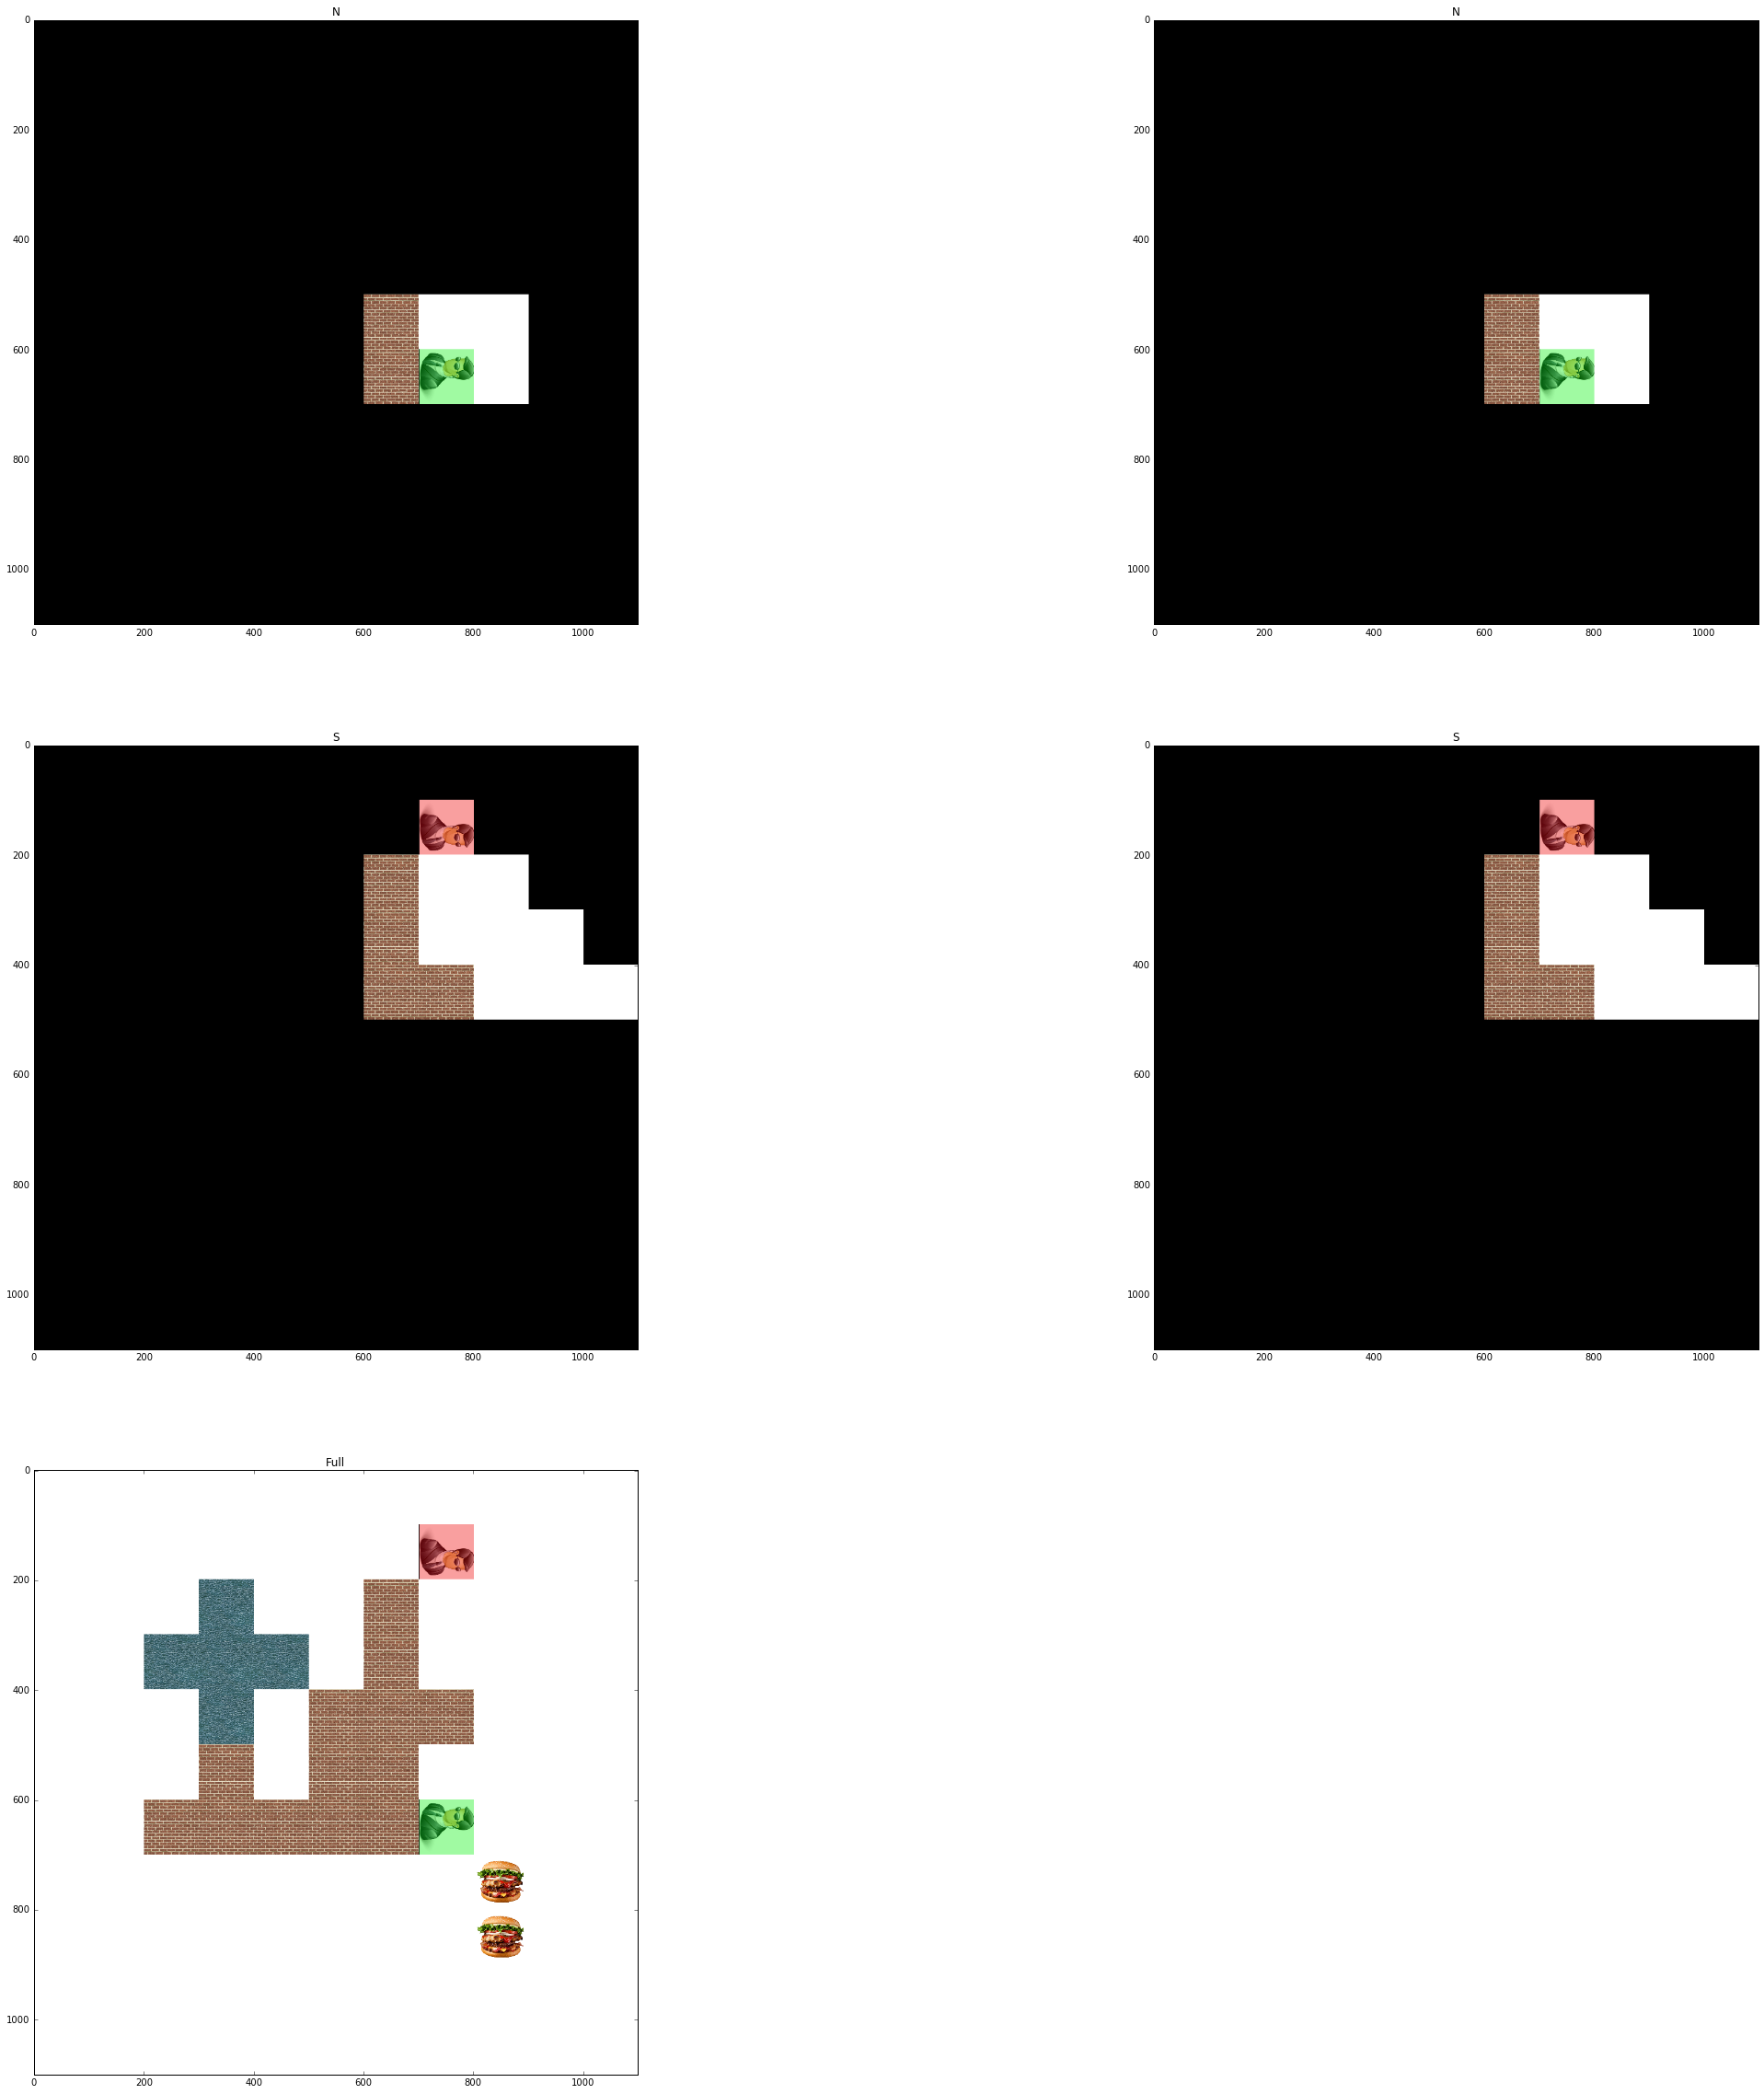

In [7]:
ElementsGeneratingTesting()
VisionFieldTest()
VisualizationTest()